<a href="https://colab.research.google.com/github/jfaa1998/atividade_python_ciencia_dados/blob/main/Joao_Felipe_Araujo_Alves_Ciencia_dos_Dados_Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving default_of_credit_card_clients__courseware_version_1_21_19.xls to default_of_credit_card_clients__courseware_version_1_21_19.xls


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls', header=None, skiprows=1)

df.columns = [
    'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'default.payment.next.month'
]


In [3]:
# Exercício 1
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [15]:
# Exercício 2
df[bill_features].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,50646.744233,48624.349167,4.649736e+04,42791.362167,39884.398167,38480.350933
std,73376.695080,70893.963498,6.910251e+04,64090.316188,60606.644833,59406.836932
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3234.000000,2682.000000,2.403000e+03,2034.000000,1534.000000,1080.000000
50%,21644.500000,20597.000000,1.975250e+04,18759.500000,17835.500000,16643.000000
75%,66148.500000,62999.750000,5.952675e+04,53572.250000,49804.000000,48863.500000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


### Comentário - Exercício 2
A distribuição dos valores de fatura mostra que a maioria está abaixo de 100 mil, com alguns casos extremos que podem ser considerados outliers.


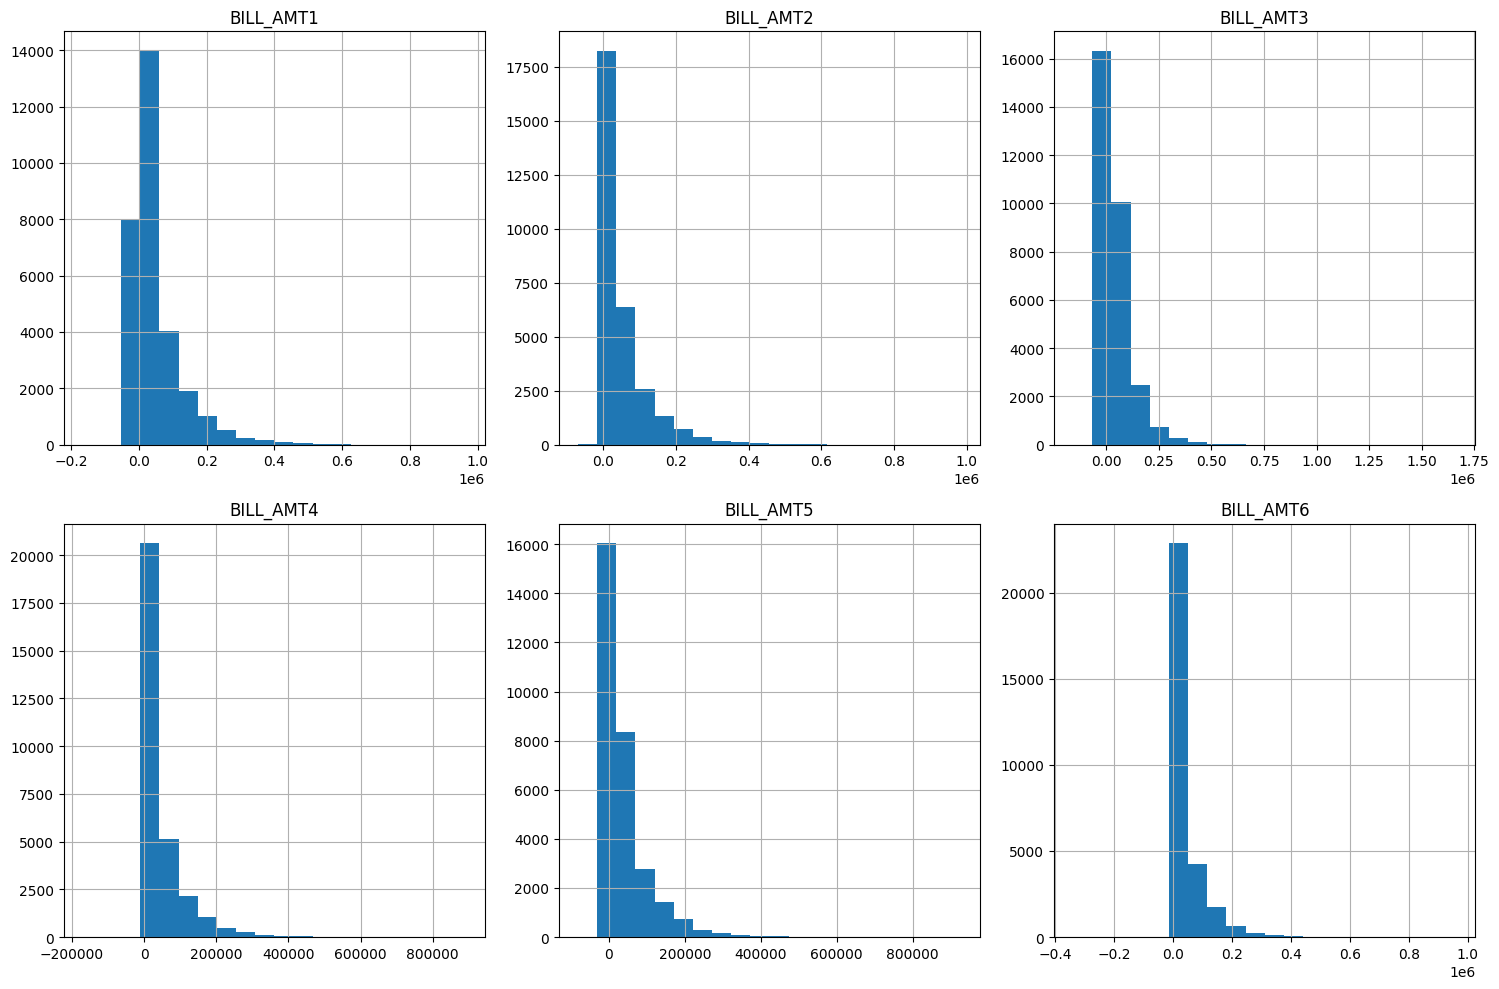

### Comentário - Exercício 3
A distribuição dos valores de fatura é assimétrica: a maioria dos clientes possui dívidas baixas, com alguns casos muito elevados. Isso mostra que existem outliers importantes na base de dados.

In [6]:
# Exercício 4
df[pay_features].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


### Comentário - Exercício 4
Os pagamentos seguem uma distribuição parecida com as faturas: muitos pagamentos baixos e poucos valores altos. Isso pode indicar que nem todos os clientes pagam o valor total da fatura mensalmente.

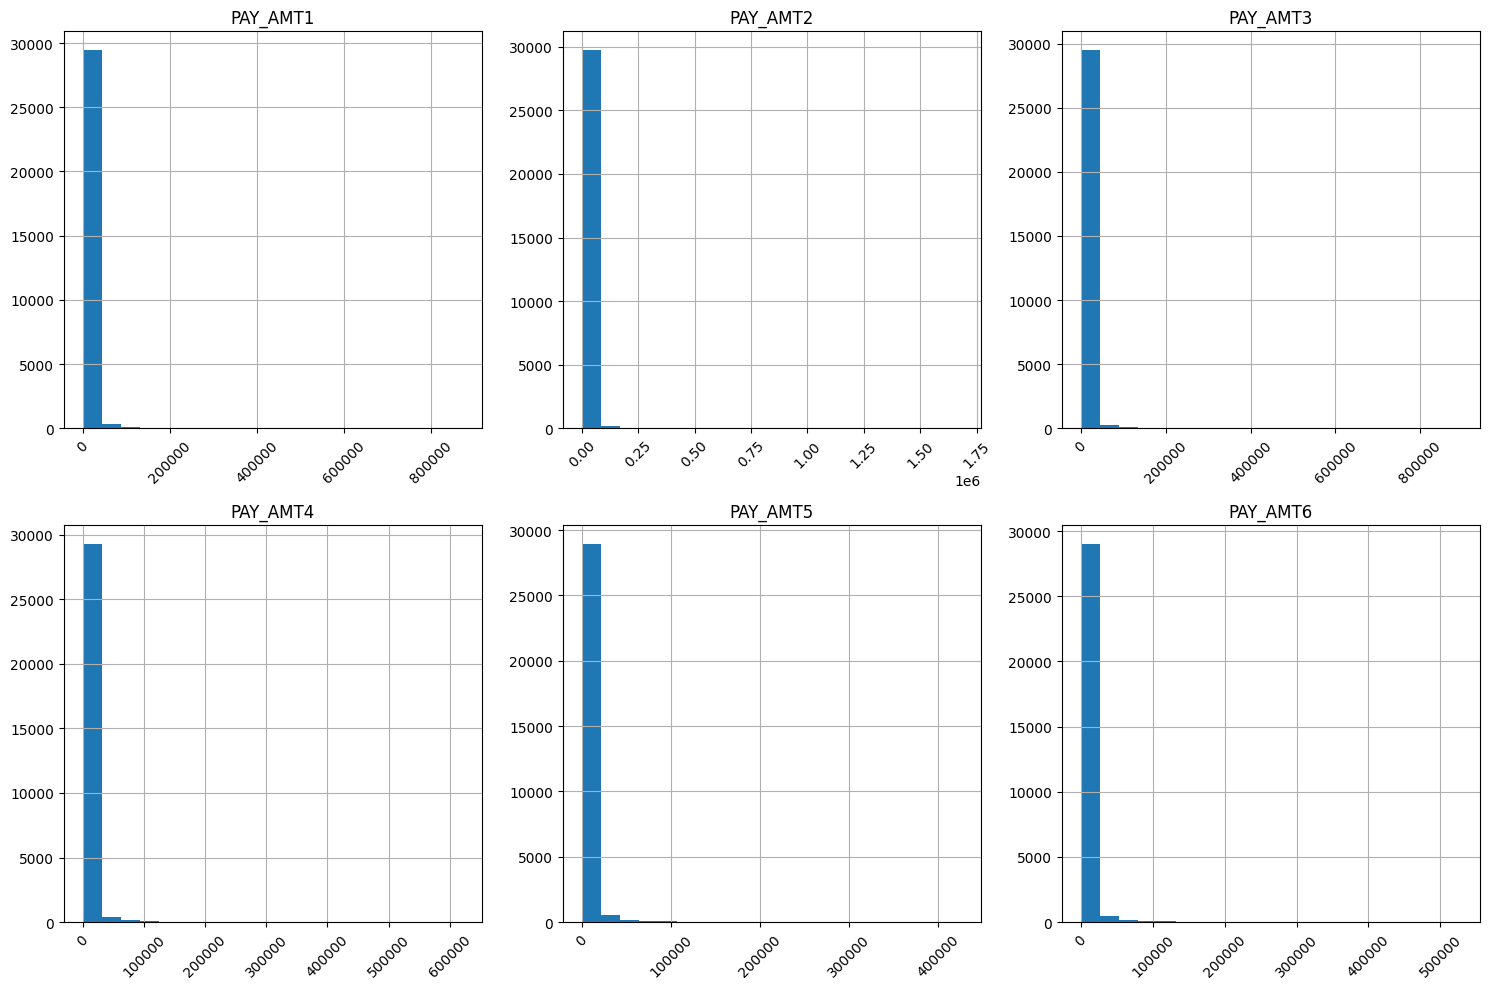

In [7]:
# Exercício 5
plt.figure(figsize=(15, 10))
for i, col in enumerate(pay_features):
    plt.subplot(2, 3, i+1)
    df[col].hist(bins=20)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comentário - Exercício 5
Os histogramas das características de pagamento apresentam uma grande concentração de valores baixos, especialmente próximos de zero. A aplicação da rotação nos rótulos do eixo X com xrot facilitou bastante a leitura dos gráficos, evitando sobreposição de valores. A distribuição dos pagamentos também demonstra comportamento assimétrico, com poucos pagamentos muito altos e muitos pagamentos pequenos ou nulos.


In [8]:
# Exercício 6
(df[pay_features] == 0).sum()


,0
PAY_AMT1,5504
PAY_AMT2,5663
PAY_AMT3,6223
PAY_AMT4,6660
PAY_AMT5,6955
PAY_AMT6,7416


### Comentário - Exercício 6
A grande quantidade de valores iguais a zero nos pagamentos faz sentido, dado que os histogramas anteriores mostravam picos nas faixas mais baixas. Isso pode indicar atrasos, inadimplência ou ausência de pagamento.


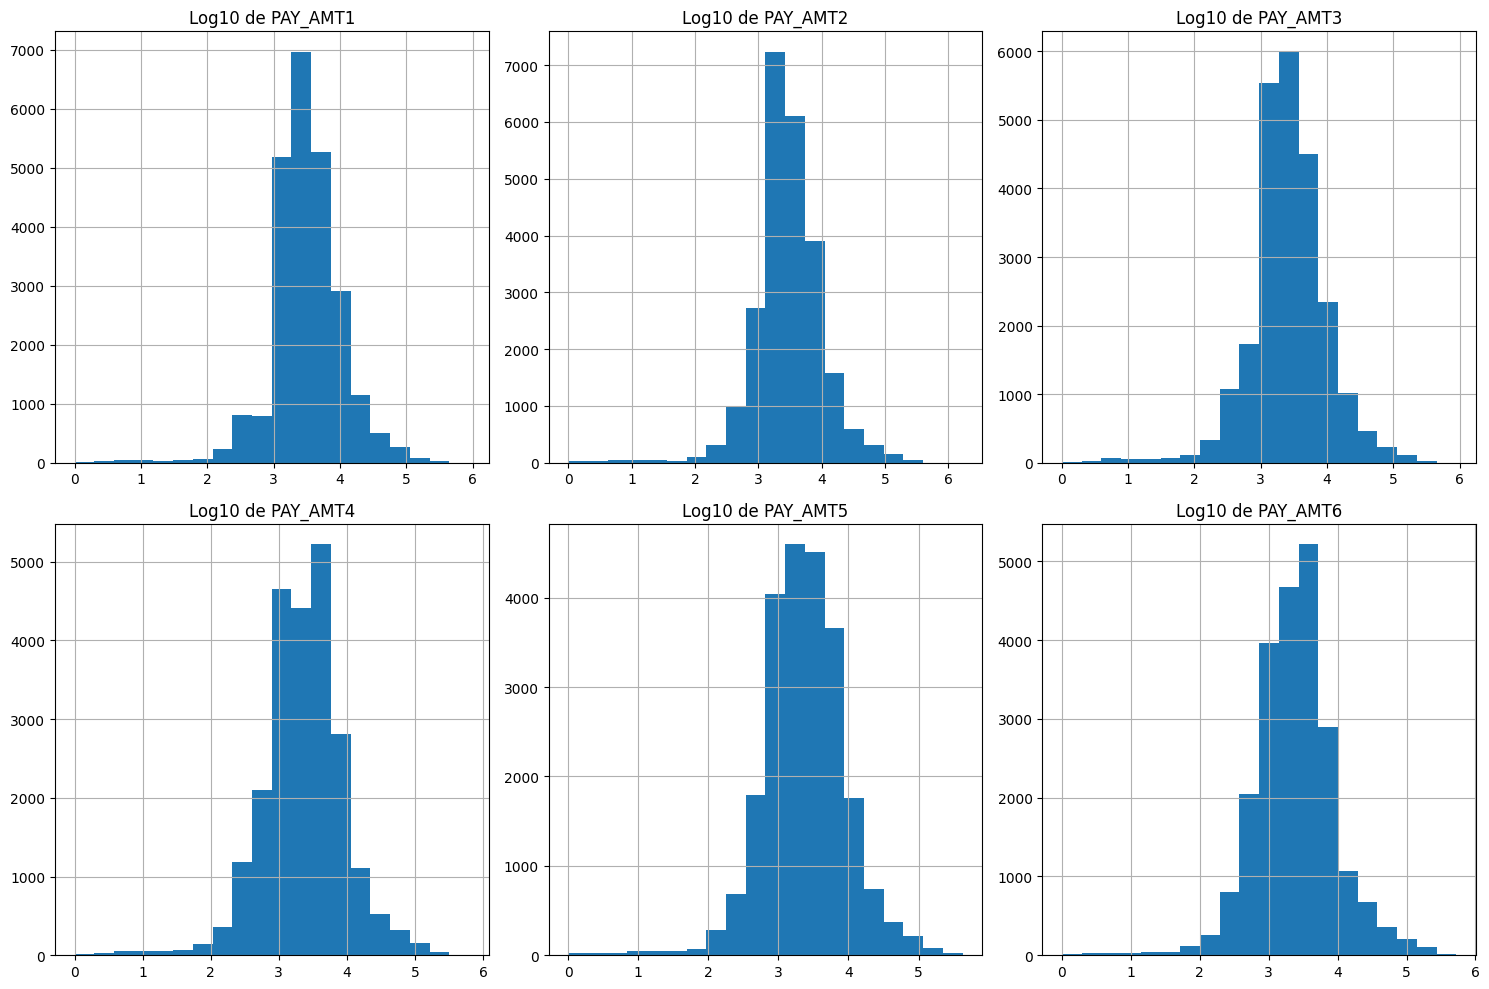

In [9]:
# Exercício 7
df_nonzero = df[pay_features].replace(0, np.nan)

plt.figure(figsize=(15, 10))
for i, col in enumerate(pay_features):
    plt.subplot(2, 3, i+1)
    df_nonzero[col].dropna().apply(np.log10).hist(bins=20)
    plt.title(f'Log10 de {col}')
plt.tight_layout()
plt.show()


### Comentário - Exercício 7
A transformação logarítmica foi eficaz para melhorar a visualização dos dados, reduzindo a influência de valores extremos e permitindo comparar melhor os pagamentos em diferentes escalas.
